In [1]:
import camelot
import pandas as pd
import pdfplumber

In [2]:
pd.set_option('display.max_rows', 50)

## Camelot and School Lice

### Which school had the most cases of lice in each year?

#### Read the PDF and specify the pages you want to scan for tables.

In [3]:
tables = camelot.read_pdf('pdfs/san-diego-school-lice.pdf', pages='1-end', flavor='lattice')

#### How many tables did Camelot detect?

In [4]:
tables

<TableList n=20>

Camelot is telling us it detected 20 tables. That's not a surprise since we know our PDF has 20 pages with tables on it and Camelot treats each table detected on a separate page as a separate table. So far, so good.

#### Let's see the first table.

In [5]:
tables[0]

<Table shape=(47, 5)>

Camelot detected the table has 47 rows and five columns.

In [6]:
tables[0].df

,0,1,2,3,4
0,,SCHOOL,GRADE,14‐15 \nVisits,15‐16 \nVisits
1,,,,,
2,,Adams Elementary,K,0,4
3,,Adams Elementary,1,1,0
4,,Adams Elementary,2,1,1
5,,Adams Elementary,3,2,2
6,,Adams Elementary,4,3,2
7,,Adams Elementary,5,0,0
8,,ALBA,7,1,0
9,,ALBA,8,0,3


#### Read the PDF using the "stream" method.

["Lattice" vs. "Stream"](https://camelot-py.readthedocs.io/en/master/user/how-it-works.html): Lattice can be used to parse tables that have demarcated lines between cells. Stream can be used to parse tables that have whitespaces between cells to simulate a table structure. If a method is not specified, lattice is used by default.

In [7]:
tables_stream = camelot.read_pdf('pdfs/san-diego-school-lice.pdf', pages='1-end', flavor='stream')

In [8]:
tables_stream[0]

<Table shape=(49, 7)>

This time, Camelot detected the table has 49 rows and seven columns. Hmm...probably not a great sign.

In [9]:
tables_stream[0].df

,0,1,2,3,4,5,6
0,,,Lice Office Visits,,,,
1,,14 ‐ 16,,,,,
2,,,,14‐15,,15‐16,
3,SCHOOL,GRADE,,Visits,,Visits,
4,Adams Elementary,,K,,0,,4
5,Adams Elementary,,1,,1,,0
6,Adams Elementary,,2,,1,,1
7,Adams Elementary,,3,,2,,2
8,Adams Elementary,,4,,3,,2
9,Adams Elementary,,5,,0,,0


As you can see, Camelot used white space to demarcate columns and rows. In this case, the "lattice" method is the proper one. So let's go back to working with that.

#### Combine the 20 extracted tables into a single table with all the schools.

We already know what the table on the first page (really the first 46 rows of the much larger complete table) look like. So what do the first five rows of the last table look like?

In [10]:
tables[19].df.head()

,0,1,2,3,4
0,,SCHOOL,GRADE,Visits,Visits
1,,Wegeforth Elementary,3,1,1
2,,Wegeforth Elementary,4,1,0
3,,Whitman Elementary,K,0,3
4,,Whitman Elementary,1,0,0


And what do the last five rows of the last table look like?

In [11]:
tables[19].df.tail()

,0,1,2,3,4
27,,Zamorano Elementary,2,2,1
28,,Zamorano Elementary,3,1,2
29,,Zamorano Elementary,4,1,3
30,,Zamorano Elementary,5,1,0
31,,Totals,,1727,2788


Time to combine all 20 tables in the PDF.

In [12]:
# Create an empty list
table_dfs = []
# Convert each item in the list of tables to a dataframe and append them to a list
table_dfs = [tables[i].df for i in range(len(tables))]
# Concatenate the dataframes in the list into a single dataframe
san_diego_school_lice = pd.concat(table_dfs)
san_diego_school_lice

,0,1,2,3,4
0,,SCHOOL,GRADE,14‐15 \nVisits,15‐16 \nVisits
1,,,,,
2,,Adams Elementary,K,0,4
3,,Adams Elementary,1,1,0
4,,Adams Elementary,2,1,1
5,,Adams Elementary,3,2,2
6,,Adams Elementary,4,3,2
7,,Adams Elementary,5,0,0
8,,ALBA,7,1,0
9,,ALBA,8,0,3


So we've got 925 rows of data (including multple header rows and a totals row at the end).

#### Clean the data.

In [13]:
# Rename the column headers
san_diego_school_lice.columns = ['blank', 'school', 'grade', '14_15_visits', '15_16_visits']
# Drop that empty first column
san_diego_school_lice = san_diego_school_lice.drop('blank', axis=1)
# Drop blank rows and duplicate header rows
san_diego_school_lice = san_diego_school_lice[(san_diego_school_lice['school'] != 'SCHOOL') &
                                             (san_diego_school_lice['school'] != '')]
san_diego_school_lice.head()

,school,grade,14_15_visits,15_16_visits
2,Adams Elementary,K,0,4
3,Adams Elementary,1,1,0
4,Adams Elementary,2,1,1
5,Adams Elementary,3,2,2
6,Adams Elementary,4,3,2


Are all our columns in the right format?

In [14]:
san_diego_school_lice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 2 to 31
Data columns (total 4 columns):
school          904 non-null object
grade           904 non-null object
14_15_visits    904 non-null object
15_16_visits    904 non-null object
dtypes: object(4)
memory usage: 35.3+ KB


Not entirely. The last two columns should be integers (numbers). Right now, they're being stored as text. Let's fix that.

In [15]:
san_diego_school_lice['14_15_visits'] = pd.to_numeric(san_diego_school_lice['14_15_visits'])
san_diego_school_lice['15_16_visits'] = pd.to_numeric(san_diego_school_lice['15_16_visits'])
san_diego_school_lice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 2 to 31
Data columns (total 4 columns):
school          904 non-null object
grade           904 non-null object
14_15_visits    904 non-null int64
15_16_visits    904 non-null int64
dtypes: int64(2), object(2)
memory usage: 35.3+ KB


#### So, which school had the most cases of lice in each year?

In [16]:
# Group by school and sum up the total cases for each school year
san_diego_school_lice_groupbed = san_diego_school_lice.groupby(['school']).agg({'14_15_visits': sum, '15_16_visits':sum})
# Sort by 14-15
san_diego_school_lice_groupbed.sort_values('14_15_visits', ascending=False).head()

,14_15_visits,15_16_visits
school,,
Totals,1727,2788
Rosa Parks Elementary,70,19
Rodriguez Elementary,63,110
Ocean Beach Elementary,62,40
Joyner Elementary,57,29


In [17]:
san_diego_school_lice_groupbed.sort_values('15_16_visits', ascending=False)

,14_15_visits,15_16_visits
school,,
Totals,1727,2788
Rodriguez Elementary,63,110
Chollas/Mead Elementary,9,83
Hancock Elementary,9,78
Edison Elementary,17,60
Crown Point Elementary,15,60
Porter Elementary,30,50
Encanto Elementary,9,49
Emerson/Bandini Elementary,37,47


So in the 2014-15 school year, Rosa Parks Elementary had the most cases of lice while in the 2015-16 school year, Rodriguez Elementary held that distinction.

#### Export the data.

In [18]:
san_diego_school_lice.to_excel('data/san-diego-school-lice.xlsx', index=False)

## pdfplumber and Layoff Notices

### Which company gave notice of the most impending layoffs?

#### Read the PDF.

In [19]:
pdf = pdfplumber.open('pdfs/ca-warn-report.pdf')

#### How many pages did pdfplumber detect?

In [20]:
len(pdf.pages)

16

pdfplumber is telling us it detected 16 pages. We know this PDF has 16 pages so this checks out. Note that this doesn't necessarily mean this document contains 16 tables as there could be more than one table on a page. pdfplumber also has the ability to select multiple tables on a single page and we'll put that ability to use later.

#### Let's see the first page.

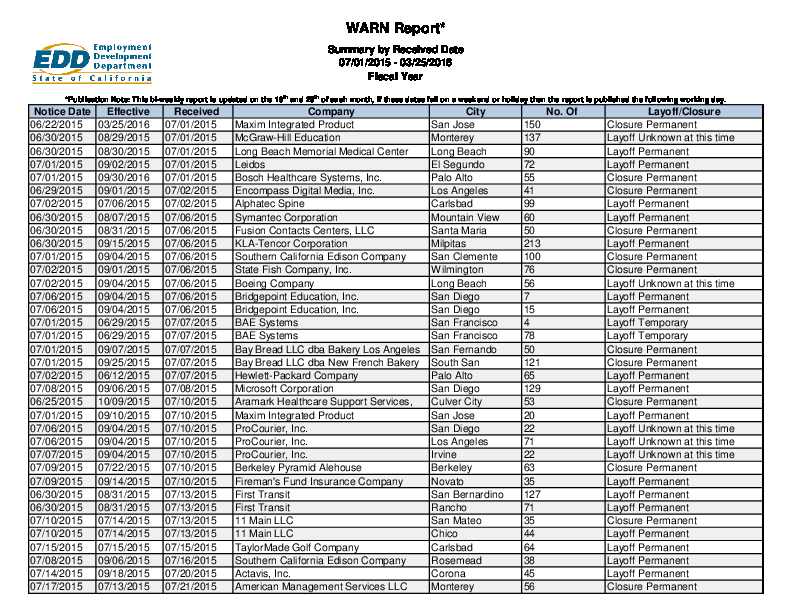

In [21]:
pdf.pages[0].to_image()

#### And how does pdfplumber see the same page?

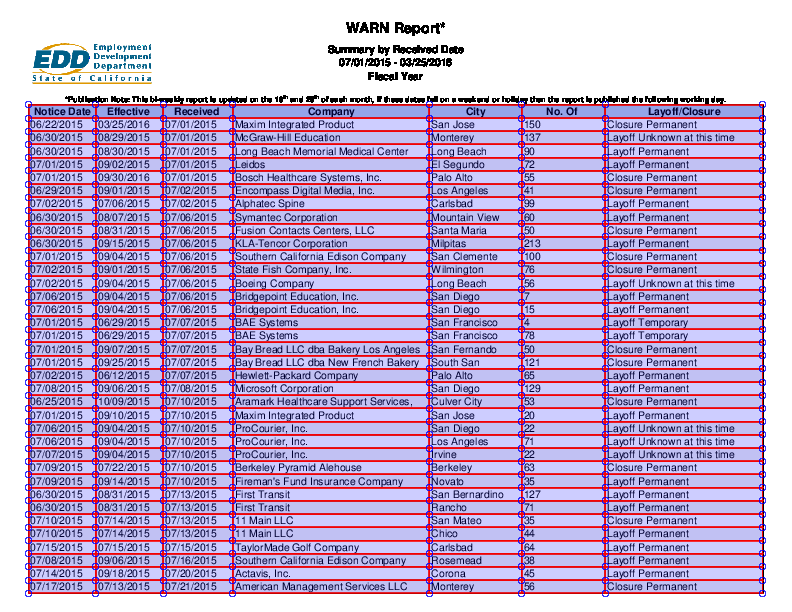

In [22]:
pdf.pages[0].to_image().debug_tablefinder()

#### Extract data from the table.

In [23]:
table = pdf.pages[0].extract_table()
# Show us the first five rows of data
table[:5]

[['Notice Date',
  'Effective',
  'Received',
  'Company',
  'City',
  'No. Of',
  'Layoff/Closure'],
 ['06/22/2015',
  '0  3  / 2  5  / 2  0  16',
  '0  7  / 0  1  / 2  0  15',
  'Maxim Integrated Product',
  'San Jose',
  '150',
  'Closure Permanent'],
 ['06/30/2015',
  '0  8  / 2  9  / 2  0  15',
  '0  7  / 0  1  / 2  0  15',
  'McGraw-Hill Education',
  'Monterey',
  '137',
  'Layoff Unknown at this time'],
 ['06/30/2015',
  '0  8  / 3  0  / 2  0  15',
  '0  7  / 0  1  / 2  0  15',
  'Long Beach Memorial Medical Center',
  'Long Beach',
  '90',
  'Layoff Permanent'],
 ['07/01/2015',
  '0  9  / 0  2  / 2  0  15',
  '0  7  / 0  1  / 2  0  15',
  'Leidos',
  'El Segundo',
  '72',
  'Layoff Permanent']]

#### What does the data in the table on the last page look like?

In [24]:
table = pdf.pages[15].extract_table()
table[:5]

[['September 2015', '76', '4,864', '47', '2', '18', '7', '2', '0'],
 ['October 2015', '71', '6,102', '38', '1', '8', '19', '2', '3'],
 ['November 2015', '41', '2,940', '13', '0', '13', '10', '3', '2'],
 ['December 2015', '69', '8,729', '21', '2', '7', '35', '2', '2'],
 ['January 2016', '85', '6,617', '28', '0', '7', '47', '0', '3']]

#### This looks like the format has really changed. Let's take a look at the actual page.

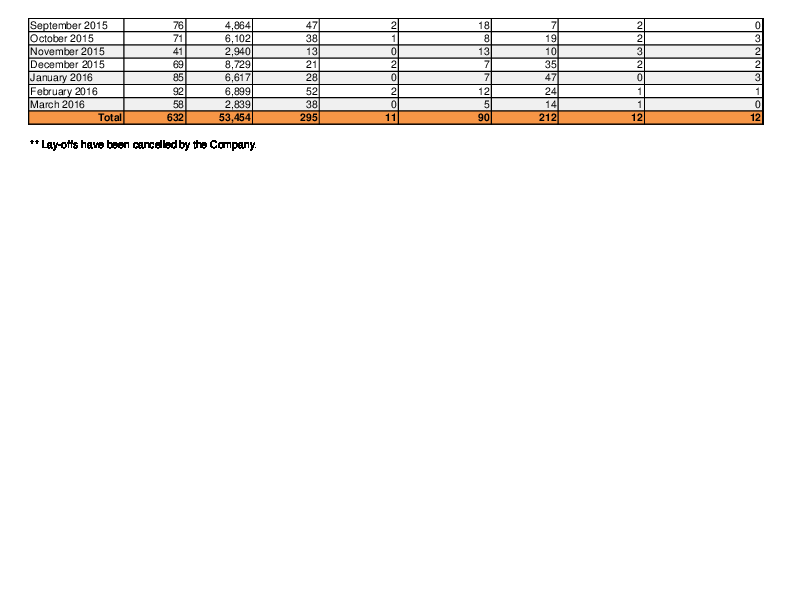

In [25]:
pdf.pages[15].to_image()

Clearly, something changed. What does the page before look like?

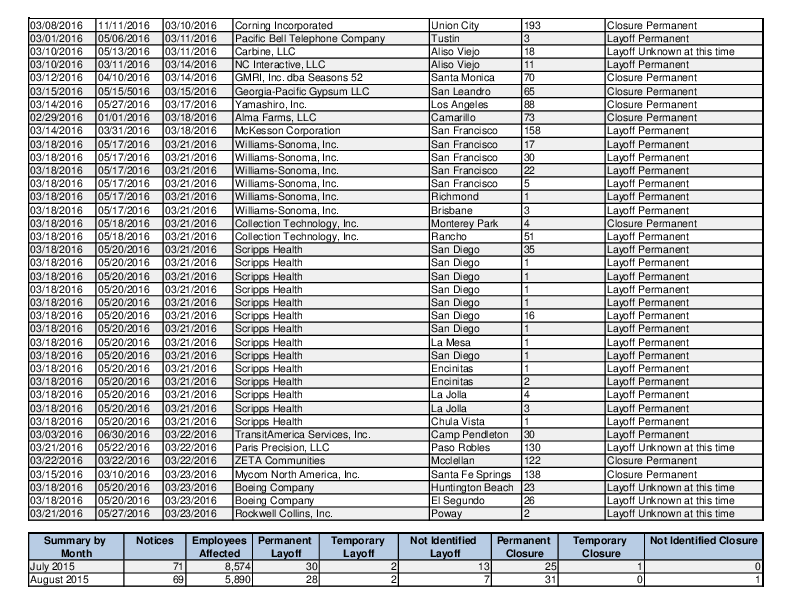

In [26]:
pdf.pages[14].to_image()

And there it is! The page with two tables on it. By default, pdfplumber will extract the larger (or largest) table on the page when it encounters a page with more than one table. So we need to handle this page on its own to only grab the first table (the one with company-level data).

#### Extract the first table on page 15.

In [27]:
# Grab the first table and assign it to a variable
first_table = pdf.pages[14].find_tables()[0]
# Extract the data from that table
first_table.extract()
# Turn that extracted data into a dataframe
first_table_df = pd.DataFrame(first_table.extract())
first_table_df.head()

,0,1,2,3,4,5,6
0,03/08/2016,1 1 / 1 1 / 2 0 16,0 3 / 1 0 / 2 0 16,Corning Incorporated,Union City,193,Closure Permanent
1,03/01/2016,0 5 / 0 6 / 2 0 16,0 3 / 1 1 / 2 0 16,Pacific Bell Telephone Company,Tustin,3,Layoff Permanent
2,03/10/2016,0 5 / 1 3 / 2 0 16,0 3 / 1 1 / 2 0 16,"Carbine, LLC",Aliso Viejo,18,Layoff Unknown at this time
3,03/10/2016,0 3 / 1 1 / 2 0 16,0 3 / 1 4 / 2 0 16,"NC Interactive, LLC",Aliso Viejo,11,Layoff Permanent
4,03/12/2016,0 4 / 1 0 / 2 0 16,0 3 / 1 4 / 2 0 16,"GMRI, Inc. dba Seasons 52",Santa Monica,70,Closure Permanent


And the bottom of the table?

In [28]:
first_table_df.tail()

,0,1,2,3,4,5,6
33,03/22/2016,0 3 / 2 2 / 2 0 16,0 3 / 2 2 / 2 0 16,ZETA Communities,Mcclellan,122,Closure Permanent
34,03/15/2016,0 3 / 1 0 / 2 0 16,0 3 / 2 3 / 2 0 16,"Mycom North America, Inc.",Santa Fe Springs,138,Closure Permanent
35,03/18/2016,0 5 / 2 0 / 2 0 16,0 3 / 2 3 / 2 0 16,Boeing Company,Huntington Beach,23,Layoff Unknown at this time
36,03/18/2016,0 5 / 2 0 / 2 0 16,0 3 / 2 3 / 2 0 16,Boeing Company,El Segundo,26,Layoff Unknown at this time
37,03/21/2016,0 5 / 2 7 / 2 0 16,0 3 / 2 3 / 2 0 16,"Rockwell Collins, Inc.",Poway,2,Layoff Unknown at this time


Cool. Now, back to the main event.

### Combine all the tables in the file.

In [29]:
tables = pdf.pages

In [30]:
# Create an empty list
table_dfs = []
# Convert each item in the list of tables to a dataframe and append them to a list
table_dfs = [pd.DataFrame(tables[i].extract_table()) for i in range(len(tables) - 2)] # But skip the last two pages
# Concatenate the dataframes in the list into a single dataframe
ca_warn_notices = pd.concat(table_dfs)
ca_warn_notices.head()

,0,1,2,3,4,5,6
0,Notice Date,Effective,Received,Company,City,No. Of,Layoff/Closure
1,06/22/2015,0 3 / 2 5 / 2 0 16,0 7 / 0 1 / 2 0 15,Maxim Integrated Product,San Jose,150,Closure Permanent
2,06/30/2015,0 8 / 2 9 / 2 0 15,0 7 / 0 1 / 2 0 15,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time
3,06/30/2015,0 8 / 3 0 / 2 0 15,0 7 / 0 1 / 2 0 15,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent
4,07/01/2015,0 9 / 0 2 / 2 0 15,0 7 / 0 1 / 2 0 15,Leidos,El Segundo,72,Layoff Permanent


And the bottom of this table?

In [31]:
ca_warn_notices.tail()

,0,1,2,3,4,5,6
38,02/17/2016,0 4 / 1 5 / 2 0 16,0 3 / 0 8 / 2 0 16,Circor Inc.,Corona,64,Closure Permanent
39,02/26/2016,0 5 / 0 4 / 2 0 16,0 3 / 0 8 / 2 0 16,Envoy Air,Palm Springs,52,Closure Permanent
40,03/01/2016,0 5 / 1 3 / 2 0 16,0 3 / 0 8 / 2 0 16,City National Bank,Los Angeles,5,Closure Permanent
41,03/01/2016,0 5 / 3 1 / 2 0 16,0 3 / 0 8 / 2 0 16,Memorial Health Services,San Clemente,194,Closure Permanent
42,03/08/2016,0 3 / 1 1 / 2 0 16,0 3 / 0 9 / 2 0 16,Lyra Sound Inc.,Cypress,4,Closure Temporary


#### Add the other table to the data.

In [32]:
ca_warn_notices = pd.concat([ca_warn_notices, first_table_df])
ca_warn_notices.tail(50)

,0,1,2,3,4,5,6
31,03/01/2016,0 4 / 3 0 / 2 0 16,0 3 / 0 1 / 2 0 16,National Oilwell Varco,Orange,232,Layoff Permanent
32,03/01/2016,0 5 / 0 1 / 2 0 16,0 3 / 0 2 / 2 0 16,Baxalta U.S. Inc.,Thousand Oaks,100,Layoff Permanent
33,03/01/2016,0 5 / 0 1 / 2 0 16,0 3 / 0 2 / 2 0 16,Baxalta U.S. Inc.,Los Angeles,132,Layoff Permanent
34,03/01/2016,0 5 / 0 1 / 2 0 16,0 3 / 0 2 / 2 0 16,Baxalta U.S. Inc.,Van Nuys,7,Layoff Permanent
35,03/01/2016,0 4 / 3 0 / 2 0 16,0 3 / 0 3 / 2 0 16,"NetApp, Inc.",Sunnyvale,376,Layoff Permanent
36,03/04/2016,0 5 / 0 3 / 2 0 16,0 3 / 0 4 / 2 0 16,"Southern Home Care Services, Inc.",San Leandro,123,Closure Permanent
37,03/07/2016,0 5 / 0 6 / 2 0 16,0 3 / 0 7 / 2 0 16,"Barnes & Noble College Booksellers, LLC",Mountain View,40,Closure Permanent
38,02/17/2016,0 4 / 1 5 / 2 0 16,0 3 / 0 8 / 2 0 16,Circor Inc.,Corona,64,Closure Permanent
39,02/26/2016,0 5 / 0 4 / 2 0 16,0 3 / 0 8 / 2 0 16,Envoy Air,Palm Springs,52,Closure Permanent
40,03/01/2016,0 5 / 1 3 / 2 0 16,0 3 / 0 8 / 2 0 16,City National Bank,Los Angeles,5,Closure Permanent


#### Clean the data.

In [33]:
# Rename the columns
ca_warn_notices.columns = ['notice_date', 'effective', 'received', 'company', 'city', 'number', 'layoff_closure']
# Drop the duplicate header row
ca_warn_notices = ca_warn_notices[(ca_warn_notices['notice_date'] != 'Notice Date')]
# Deal with extra spaces in the second and third columns
ca_warn_notices['effective'] = ca_warn_notices['effective'].str.replace(' ', '')
ca_warn_notices['received'] = ca_warn_notices['received'].str.replace(' ', '')
ca_warn_notices.head()

,notice_date,effective,received,company,city,number,layoff_closure
1,06/22/2015,03/25/2016,07/01/2015,Maxim Integrated Product,San Jose,150,Closure Permanent
2,06/30/2015,08/29/2015,07/01/2015,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time
3,06/30/2015,08/30/2015,07/01/2015,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent
4,07/01/2015,09/02/2015,07/01/2015,Leidos,El Segundo,72,Layoff Permanent
5,07/01/2015,09/30/2016,07/01/2015,"Bosch Healthcare Systems, Inc.",Palo Alto,55,Closure Permanent


Are all our columns in the right format?

In [34]:
ca_warn_notices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 1 to 37
Data columns (total 7 columns):
notice_date       633 non-null object
effective         633 non-null object
received          633 non-null object
company           633 non-null object
city              633 non-null object
number            633 non-null object
layoff_closure    633 non-null object
dtypes: object(7)
memory usage: 39.6+ KB


Oops. The number of layoffs is being treated as text.

In [35]:
ca_warn_notices['number'] = pd.to_numeric(ca_warn_notices['number'])
ca_warn_notices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 1 to 37
Data columns (total 7 columns):
notice_date       633 non-null object
effective         633 non-null object
received          633 non-null object
company           633 non-null object
city              633 non-null object
number            633 non-null int64
layoff_closure    633 non-null object
dtypes: int64(1), object(6)
memory usage: 39.6+ KB


### So, which company gave notice of the most impending layoffs?

In [36]:
ca_warn_notices_grouped = ca_warn_notices.groupby(['company']).agg({'number': sum})
ca_warn_notices_grouped.sort_values('number', ascending=False).head()

,number
company,
Toyota Motor North America,3100
"Gerawan Farming, Inc.",2551
"DNC Parks & Resorts at Yosemite, Inc.",1718
Walmart,1652
Qualcomm Incorporated,1476


So, Toyota execs spent this period of time furiously laying people off. Good to know.

#### Export the data.

In [37]:
ca_warn_notices.to_excel('data/ca_warn_notices.xlsx', index=False)

## pdfplumber and food insecurity data

### Which type of household is least food secure?

#### Read the PDF.

In [38]:
pdf = pdfplumber.open('pdfs/us-food-insecurity.pdf')

#### The data we want is on page 20 (remember Python is zero-indexed).

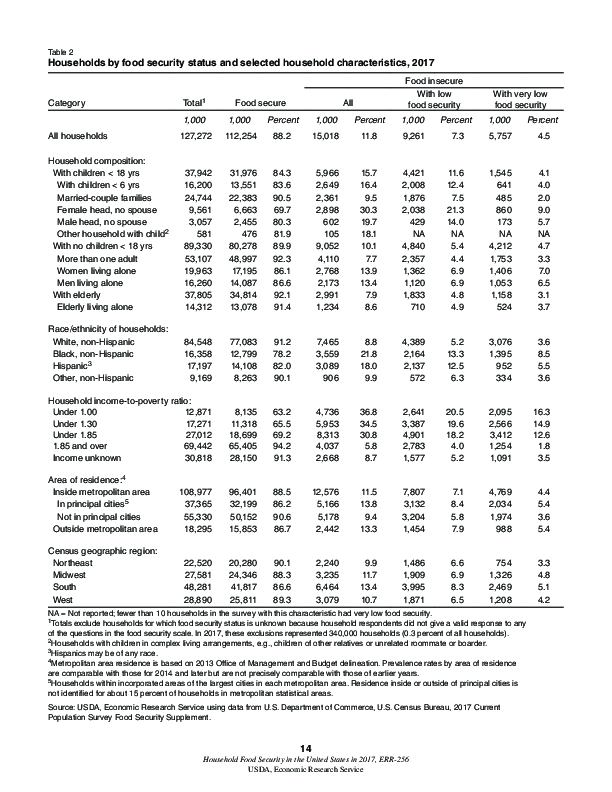

In [39]:
im = pdf.pages[21].to_image()
im

#### How does pdfplumber see the page?

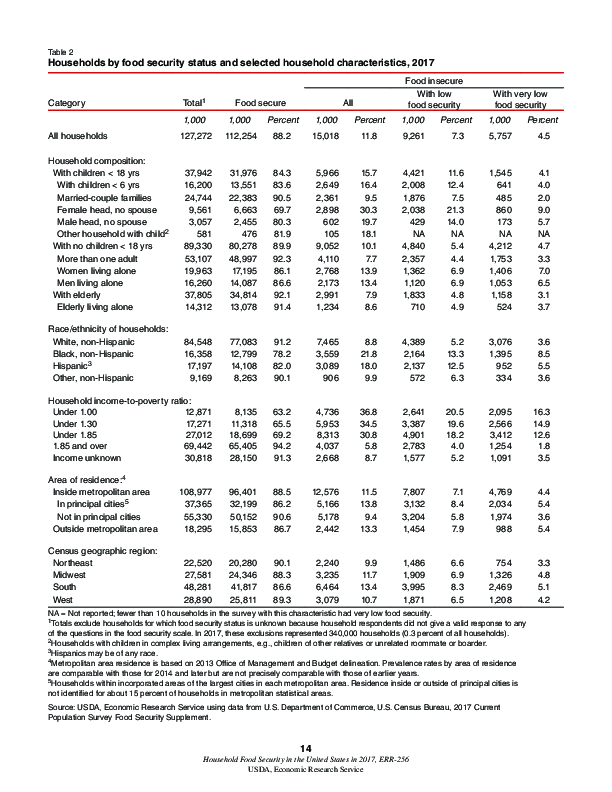

In [40]:
im.reset().debug_tablefinder()

#### pdfplumber, by default, looks for lines to demarcate columns and rows. But in this case, this table uses text (or the absence thereof) to do so. We need to tell pdfplumber to use that method, referred to as "text."

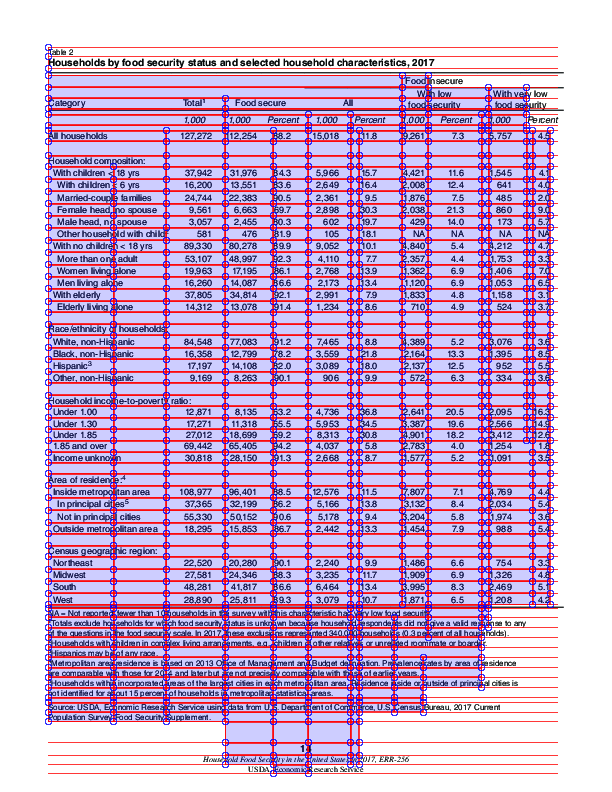

In [41]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text"
}
im.reset().debug_tablefinder(table_settings)

Better! But we don't want all that footnote text at the botom. Let's crop that out.

#### Crop the page.

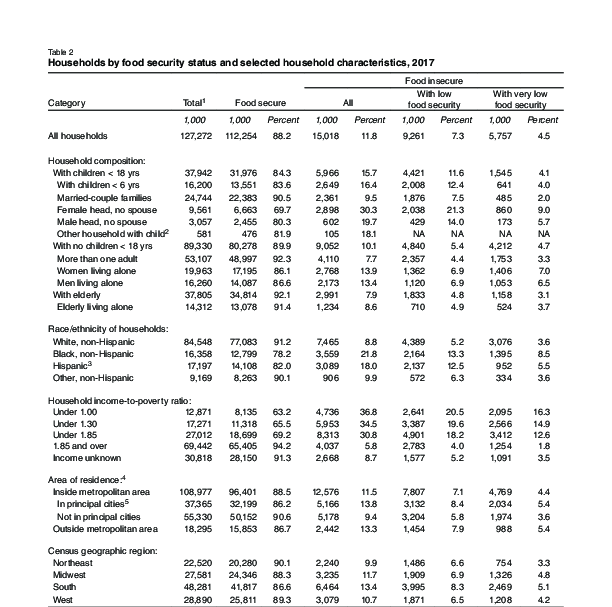

In [42]:
cropped = pdf.pages[21].crop((0, 0, pdf.pages[21].width, pdf.pages[21].height-185)) #(x1, top, x2, bottom)
im_cropped = cropped.to_image()
im_cropped

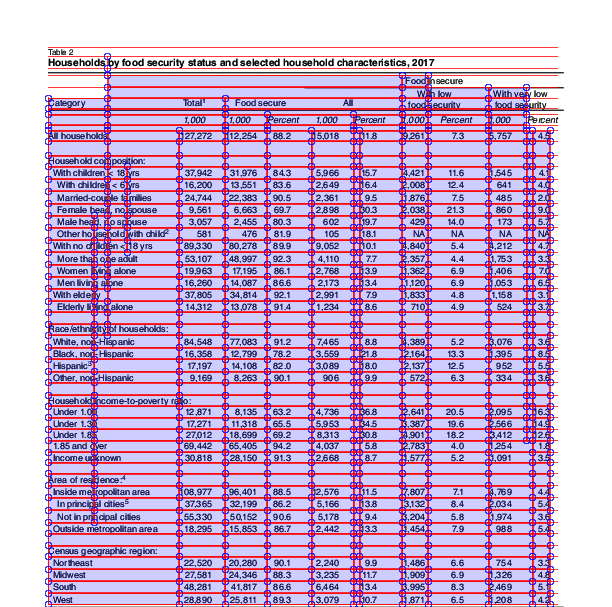

In [43]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text"
}
im_cropped.reset().debug_tablefinder(table_settings)

Better still! But pdfplumber's being a little aggressive in creating multiple columns when there should just be one. Let's fix that.

#### Set a minimum number of words.

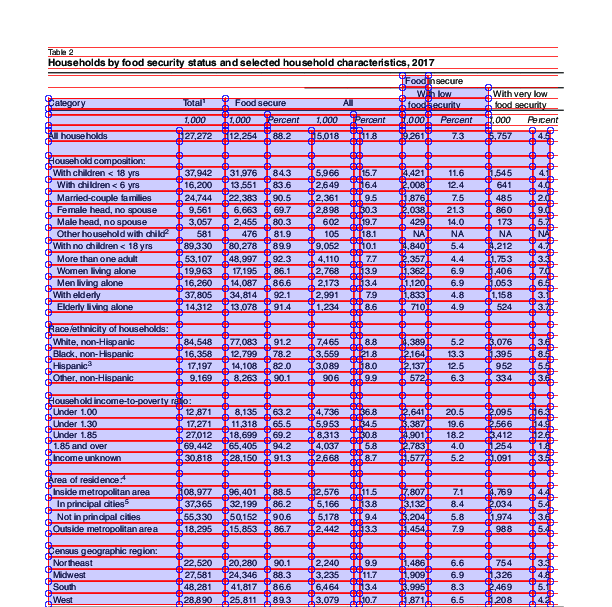

In [44]:
table_settings = {
    "vertical_strategy": "text",
    "horizontal_strategy": "text",
    "min_words_vertical": 20
}
im_cropped.reset().debug_tablefinder(table_settings)

Not bad. Let's get the data extracted and into a dataframe.

#### Convert to a dataframe

In [45]:
food_insecurity_df = pd.DataFrame(cropped.extract_table(table_settings))
food_insecurity_df

,0,1,2,3,4,5,6,7,8,9,10
0,None,None,None,None,None,None,None,Food,None,None,None
1,None,None,None,None,None,None,None,Wi,th low,None,None
2,Category Total1,None,Food secure All,None,None,None,None,food,security,None,None
3,,None,,None,None,None,None,,,None,None
4,"1,000",None,"1,000","Percent 1,000",None,Percent,None,"1,000",Percent,None,None
5,,None,,,None,,None,,,None,None
6,All households,"127,272","112,254",88.2,"15,018",,11.8,"9,261",7.3,"5,757",4.5
7,,,,,,,,,,,
8,Household composition:,,,,,,,,,,
9,With children < 18 yrs,"37,942","31,976",84.3,"5,966",,15.7,"4,421",11.6,"1,545",4.1


#### Clean the data.

In [46]:
# Rename the column headers
food_insecurity_df.columns=['category', 'total', 'food_secure', 'food_secure_pct', 'food_insecure_all',
                           'blank', 'food_insecure_all_pct', 'food_insecure_low_food_security',
                            'food_insecure_low_food_security_pct', 'food_insecure_very_low_food_security',
                           'food_insecure_very_low_food_security_pct']
# Drop the empty sixth column
food_insecurity_df = food_insecurity_df.drop('blank', axis=1)
# Drop blank rows
food_insecurity_df = food_insecurity_df[(food_insecurity_df['food_insecure_very_low_food_security_pct'] != '')]
food_insecurity_df.head()

,category,total,food_secure,food_secure_pct,food_insecure_all,food_insecure_all_pct,food_insecure_low_food_security,food_insecure_low_food_security_pct,food_insecure_very_low_food_security,food_insecure_very_low_food_security_pct
0,None,None,None,None,None,None,Food,None,None,None
1,None,None,None,None,None,None,Wi,th low,None,None
2,Category Total1,None,Food secure All,None,None,None,food,security,None,None
3,,None,,None,None,None,,,None,None
4,"1,000",None,"1,000","Percent 1,000",None,None,"1,000",Percent,None,None


If we try to sort by a column with mixed types (e.g. text and numbers), pandas will throw an error. So we need to convert the column we want to sort to numeric data type.

#### Let's convert our food_secure_pct column to its proper numeric format.

In [47]:
food_insecurity_df['food_secure_pct'] = pd.to_numeric(food_insecurity_df['food_secure_pct'], errors='coerce')
food_insecurity_df.head()

,category,total,food_secure,food_secure_pct,food_insecure_all,food_insecure_all_pct,food_insecure_low_food_security,food_insecure_low_food_security_pct,food_insecure_very_low_food_security,food_insecure_very_low_food_security_pct
0,None,None,None,NaN,None,None,Food,None,None,None
1,None,None,None,NaN,None,None,Wi,th low,None,None
2,Category Total1,None,Food secure All,NaN,None,None,food,security,None,None
3,,None,,NaN,None,None,,,None,None
4,"1,000",None,"1,000",NaN,None,None,"1,000",Percent,None,None


#### So, which type of household is least food secure?

In [48]:
# Sort by food_secure_pct
food_insecurity_df.sort_values('food_secure_pct', ascending=True).head(10) # Show the top 10 rows

,category,total,food_secure,food_secure_pct,food_insecure_all,food_insecure_all_pct,food_insecure_low_food_security,food_insecure_low_food_security_pct,food_insecure_very_low_food_security,food_insecure_very_low_food_security_pct
29,Under 1.00,"12,871","8,135",63.2,"4,736",36.8,"2,641",20.5,"2,095",16.3
30,Under 1.30,"17,271","11,318",65.5,"5,953",34.5,"3,387",19.6,"2,566",14.9
31,Under 1.85,"27,012","18,699",69.2,"8,313",30.8,"4,901",18.2,"3,412",12.6
12,"Female head, no spouse","9,561","6,663",69.7,"2,898",30.3,"2,038",21.3,860,9.0
24,"Black, non-Hispanic","16,358","12,799",78.2,"3,559",21.8,"2,164",13.3,"1,395",8.5
13,"Male head, no spouse","3,057","2,455",80.3,602,19.7,429,14.0,173,5.7
14,Other household with child2,581,476,81.9,105,18.1,NA,NA,NA,NA
25,Hispanic3,"17,197","14,108",82.0,"3,089",18.0,"2,137",12.5,952,5.5
10,With children < 6 yrs,"16,200","13,551",83.6,"2,649",16.4,"2,008",12.4,641,4.0
9,With children < 18 yrs,"37,942","31,976",84.3,"5,966",15.7,"4,421",11.6,"1,545",4.1


#### Export the data.

In [49]:
food_insecurity_df.to_excel('data/food_insecurity_df.xlsx', index=False)